In [1]:
import torch

In [2]:
b = torch.tensor([1., 2., 3.])
print(b.dtype)

torch.float32


In [3]:
print(b.shape)

torch.Size([3])


In [4]:
print(torch.cuda.is_available())

False


### Fully Connected layer in torch

In [5]:
X = torch.arange(50, dtype=float).view(10, 5)
X

tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.],
        [25., 26., 27., 28., 29.],
        [30., 31., 32., 33., 34.],
        [35., 36., 37., 38., 39.],
        [40., 41., 42., 43., 44.],
        [45., 46., 47., 48., 49.]], dtype=torch.float64)

In [6]:
fc_layer = torch.nn.Linear(in_features = 5, out_features = 3)

In [7]:
fc_layer.weight

Parameter containing:
tensor([[-0.1339, -0.3912,  0.0081,  0.0729, -0.4418],
        [ 0.0547,  0.2288, -0.1107,  0.3674, -0.0028],
        [-0.2782, -0.3820, -0.1122,  0.2293, -0.2217]], requires_grad=True)

In [8]:
fc_layer.bias

Parameter containing:
tensor([-0.3805,  0.1156, -0.4393], requires_grad=True)

### Linear Regression

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv("/content/linreg-data.csv", index_col=0)
df.head()

,x1,x2,y
0,-2.201441,-0.468864,-30.355617
1,-0.291041,0.777277,25.560334
2,-0.327755,0.040071,32.797526
3,-0.075650,1.821915,72.734577
4,-0.862493,-0.467493,-48.072356


In [29]:
# Assign the features and target

X = torch.tensor(df[["x1", "x2"]].values, dtype=torch.float32)
y = torch.tensor(df["y"].values, dtype=torch.float32)

# Shuffling train/test split

torch.manual_seed(123)
shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)

X, y = X[shuffle_idx], y[shuffle_idx]

percent70 = int(shuffle_idx.size(0)*0.70)

X_train, y_train = X[:percent70], y[:percent70]
X_test, y_test = X[percent70:], y[percent70:]

# Normalize (mean zero, unit variance)

mu, sigma = X_train.mean(dim=0), X_train.std(dim=0)
X_train = (X_train - mu)/sigma
X_test = (X_test - mu)/sigma

### Implement Linear Regression Model

In [42]:
class LinearRegression():
  def __init__(self, num_features):
    self.num_features = num_features
    self.weights = torch.zeros(num_features, 1,
                               dtype=torch.float)
    self.bias = torch.zeros(1, dtype=torch.float)


  def forward(self, x):
    netinputs = netinputs = torch.mm(x, self.weights) + self.bias
    activations = netinputs
    return activations.view(-1)

  def backward(self, x, yhat, y):
    grad_loss_yhat = 2*(yhat - y)
    grad_yhat_weights = x
    grad_yhat_bias = 1.

    # Chain rule: Inner times outer

    grad_loss_weights = torch.mm(grad_yhat_weights.t(), grad_loss_yhat.view(-1, 1)) / y.size(0)

    grad_loss_bias = torch.sum(grad_yhat_bias*grad_loss_yhat) / y.size(0)

    #return negative gradient

    return (-1)*grad_loss_weights, (-1)*grad_loss_bias

In [43]:
# Training and Evaluation Functions
def loss(yhat, y):
  return torch.mean((yhat - y)**2)

def train(model, x, y, num_epochs, learning_rate = 0.01):
  cost = []
  for e in range(num_epochs):
    # compute outputs
    yhat = model.forward(x)

    #compute gradients
    negative_grad_w, negative_grad_b = model.backward(x, yhat, y)

    #update weights
    model.weights +=learning_rate * negative_grad_w
    model.bias += learning_rate * negative_grad_b

    #logging
    yhat = model.forward(x)
    curr_loss = loss(yhat, y)
    print("Epoch: %03d" % (e+1), end = " ")
    print("Loss MSE: %0.5f" % curr_loss)
    cost.append(curr_loss)
  return cost

In [50]:
#Training Linear Regression Model
model = LinearRegression(num_features=X_train.size(1))
cost = train(model,
             X_train, y_train,
             num_epochs = 100,
             learning_rate = 0.01)

Epoch: 001 Loss MSE: 1921.43640
Epoch: 002 Loss MSE: 1860.66553
Epoch: 003 Loss MSE: 1802.29749
Epoch: 004 Loss MSE: 1746.23682
Epoch: 005 Loss MSE: 1692.39307
Epoch: 006 Loss MSE: 1640.67798
Epoch: 007 Loss MSE: 1591.00769
Epoch: 008 Loss MSE: 1543.30103
Epoch: 009 Loss MSE: 1497.48096
Epoch: 010 Loss MSE: 1453.47229
Epoch: 011 Loss MSE: 1411.20374
Epoch: 012 Loss MSE: 1370.60632
Epoch: 013 Loss MSE: 1331.61389
Epoch: 014 Loss MSE: 1294.16345
Epoch: 015 Loss MSE: 1258.19336
Epoch: 016 Loss MSE: 1223.64551
Epoch: 017 Loss MSE: 1190.46362
Epoch: 018 Loss MSE: 1158.59363
Epoch: 019 Loss MSE: 1127.98376
Epoch: 020 Loss MSE: 1098.58398
Epoch: 021 Loss MSE: 1070.34656
Epoch: 022 Loss MSE: 1043.22559
Epoch: 023 Loss MSE: 1017.17694
Epoch: 024 Loss MSE: 992.15814
Epoch: 025 Loss MSE: 968.12842
Epoch: 026 Loss MSE: 945.04877
Epoch: 027 Loss MSE: 922.88153
Epoch: 028 Loss MSE: 901.59082
Epoch: 029 Loss MSE: 881.14178
Epoch: 030 Loss MSE: 861.50122
Epoch: 031 Loss MSE: 842.63702
Epoch: 032 Loss 

### Evaluate the linear regression model

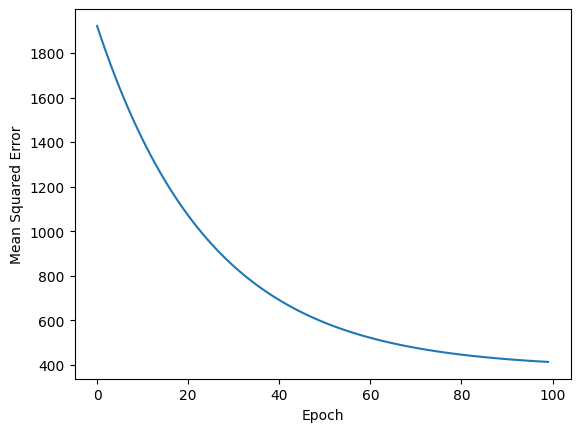

In [51]:
# plot mse
plt.plot(range(len(cost)), cost)
plt.ylabel("Mean Squared Error")
plt.xlabel("Epoch")
plt.show()

In [52]:
train_pred = model.forward(X_train)
test_pred = model.forward(X_test)

print("Train MSE: %.5f" % loss(train_pred, y_train))
print("Test MSE: %.5f" % loss(test_pred, y_test))

Train MSE: 412.67865
Test MSE: 395.01062


### Autograd Example

In [53]:
from torch.autograd import grad
import torch.nn.functional as F

In [54]:
x = torch.tensor([3.])
w = torch.tensor([2.], requires_grad = True)
b = torch.tensor([1.], requires_grad = True)
a = F.relu(x*w + b)

In [55]:
a

tensor([7.], grad_fn=<ReluBackward0>)

In [56]:
grad(a, w, retain_graph=True)

(tensor([3.]),)

In [57]:
grad(a, b)

(tensor([1.]),)

### MLP

In [58]:
class MultiLayerPerceptron(torch.nn.Module):
  def __init__(self, num_features, num_classes):
    super(MultiLayerPerceptron, self).__init__()

    ## 1st hidden layer
    self.linear_1 = torch.nn.Linear(num_feat, num_h1)

    ## 2nd hidden layer
    self.linear_2 = torch.nn.Linear(num_h1, num_h2)

    ## 3rd hidden layer
    self.linear_3 = torch.nn.Linear(num_h2, num_classes)

  def forward(self, x):
    out = self.linear_1(x)
    out = F.relu(out)
    out = self.linear_2(out)
    out = F.relu(out)
    logits = self.linear_3(out)
    probas = F.log_softmax(logits, dim=1)
    return logits, probas

In [ ]:
torch.manual_seed(random_seed)
model = MultiLayerPerceptron(num_features = num_features, num_classes= num_classes)

model = model.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
for epoch in range(num_epochs):
  model.train()
  for batch_idx, (features, targets) in enumerate(train_loader):
   features = features.view(-1, 28*28).to(device)
   targets = targets.to(device)

   #FORWARD AND BACK PROP
   logits, probas = model(features)
   cost = F.cross_entropy(logits, targets)
   optimizer.zero_grad()

   cost.backward()

   #UPDATE MODEL PARAMS
   optimizer.step()

  model.eval()
  with torch.no_grad():
    #compute accuracy